In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import pandas
import ChernoffFace

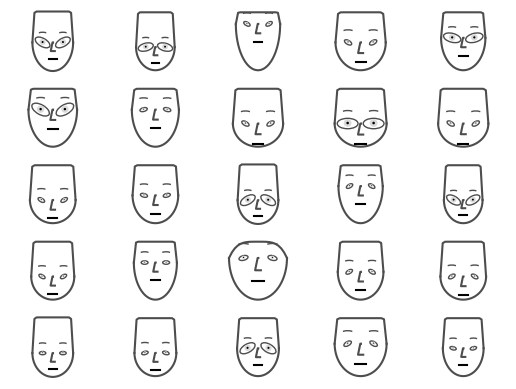

In [2]:
# Read the data and plot the columns
grades = pandas.read_csv("Grades.csv")
n = 25
sample = grades.sample(n)
data = (sample - sample.min()) / (sample.max() - sample.min())
fig = ChernoffFace.chernoff_face(data, n_columns = 5, long_face = True)

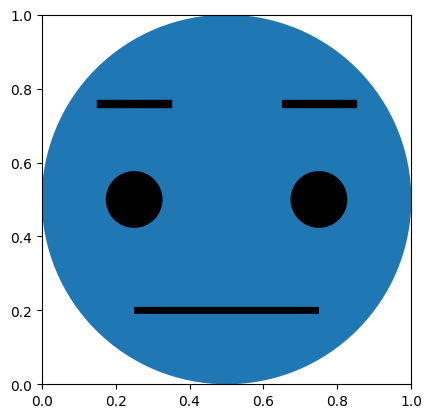

In [3]:
# Plot a face from scratch, Exam = Mouth, Project = Eyebrow, Quiz = Eye
def mix(p, a, b):
    return (1 - p) * a + p * b

def plot_face(x, ax):
    face = plt.Circle((0.5, 0.5), 0.5)
    ax.add_artist(face)
    left_eye = plt.Circle((0.25, 0.5), mix(x[2], 0.05, 0.1), color = "black")
    ax.add_artist(left_eye)
    right_eye = plt.Circle((0.75, 0.5), mix(x[2], 0.05, 0.1), color = "black")
    ax.add_artist(right_eye)
    left_eyebrow = plt.Rectangle((0.25 - 0.1, 0.75), 0.2, 0.02, color = "black", angle = mix(x[1], 45, -45), rotation_point = "center")
    ax.add_artist(left_eyebrow)
    right_eyebrow = plt.Rectangle((0.75 - 0.1, 0.75), 0.2, 0.02, color = "black", angle = mix(x[1], -45, 45), rotation_point = "center")
    ax.add_artist(right_eyebrow)
    mouth = patches.PathPatch(path.Path([(0.25, mix(x[0], 0.1, 0.3)), (0.33, mix(x[0], 0.25, 0.15)), (0.66, mix(x[0], 0.25, 0.15)), (0.75, mix(x[0], 0.1, 0.3))], [path.Path.MOVETO, path.Path.CURVE4, path.Path.CURVE4, path.Path.CURVE4]), linewidth = 5)
    ax.add_artist(mouth)
    ax.set_aspect(1)

fig, ax = plt.subplots()
plot_face([0.5, 0.5, 0.5, 1, 1], ax)

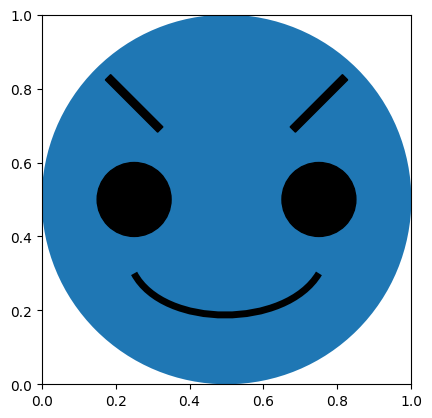

In [4]:
# Plot happy face
fig, ax = plt.subplots()
plot_face([1, 1, 1, 1, 1], ax)

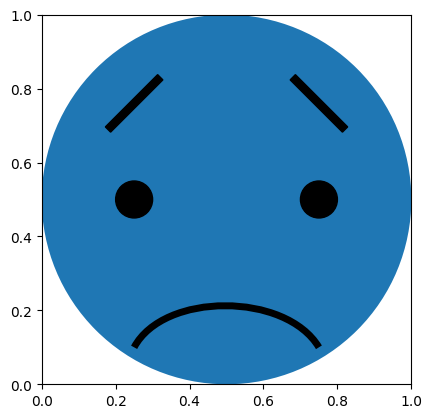

In [5]:
# Plot unhappy face
fig, ax = plt.subplots()
plot_face([0, 0, 0, 1, 1], ax)

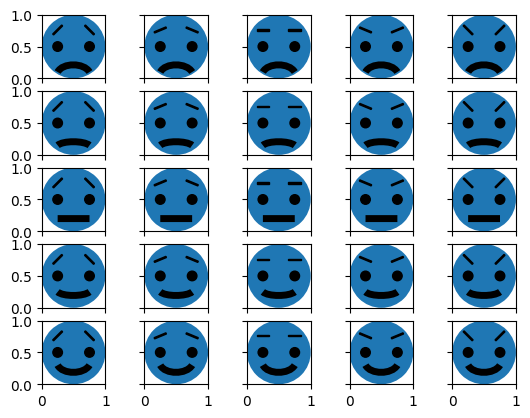

In [6]:
# Plot different faces
fig, ax = plt.subplots(5, 5, sharex = True, sharey = True)
for i in range(5):
    for j in range(5):
        plot_face([i / 4, j / 4, 0.5, 1, 1], ax[i, j])

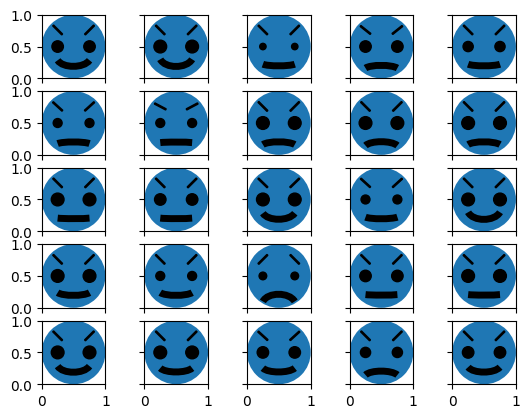

In [7]:
# Plot faces from data
fig, ax = plt.subplots(5, 5, sharex = True, sharey = True)
for i in range(5):
    for j in range(5):
        plot_face(list(data.iloc[i * 5 + j]), ax[i, j])